<a href="https://colab.research.google.com/github/BugganaLekha/Big-Data-Analytics/blob/main/Big%20Data%20Analytics_Swiggy%20Dataset%20Act1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import csv
from collections import Counter, defaultdict
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
file_path = "/content/sample_data/swiggy_orders_sample.csv"

In [ ]:
orders = []
with open(file_path, newline='', encoding="utf-8") as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        orders.append(row)

In [ ]:
# 1. Top 3 cuisines
cuisine_count = Counter(row["cuisine"] for row in orders)
top_3_cuisines = cuisine_count.most_common(3)

print("Task 1 - Top 3 cuisines:\n", top_3_cuisines, "\n")

Task 1 - Top 3 cuisines:
 [('South Indian', 47), ('Fast Food', 44), ('Chinese', 38)] 



In [ ]:
# 2. City with most orders
city_count = Counter(row["city"] for row in orders)
city_most_orders = city_count.most_common(1)

print("Task 2 - City with most orders:\n", city_most_orders, "\n")

Task 2 - City with most orders:
 [('Bangalore', 48)] 



In [ ]:
# 3. Top 5 spenders
user_spending = defaultdict(float)
for row in orders:
    try:
        user_spending[row["user_id"]] += float(row["order_amount"])
    except:
        pass
top_5_spenders = sorted(user_spending.items(), key=lambda x: x[1], reverse=True)[:5]

print("Task 3 - Top 5 spenders:\n", top_5_spenders, "\n")

Task 3 - Top 5 spenders:
 [('U021', 4787.0), ('U013', 4507.0), ('U036', 4383.0), ('U041', 3925.0), ('U030', 3684.0)] 



In [ ]:
# 4. Total orders in each city
orders_per_city = dict(city_count)
orders_per_city
print("Task 4 - Total orders in each city:\n", orders_per_city, "\n")

Task 4 - Total orders in each city:
 {'Chennai': 34, 'Bangalore': 48, 'Mumbai': 43, 'Delhi': 35, 'Hyderabad': 40} 



/tmp/ipython-input-1246564953.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=orders_count_by_city.index, y=orders_count_by_city.values, palette="magma")


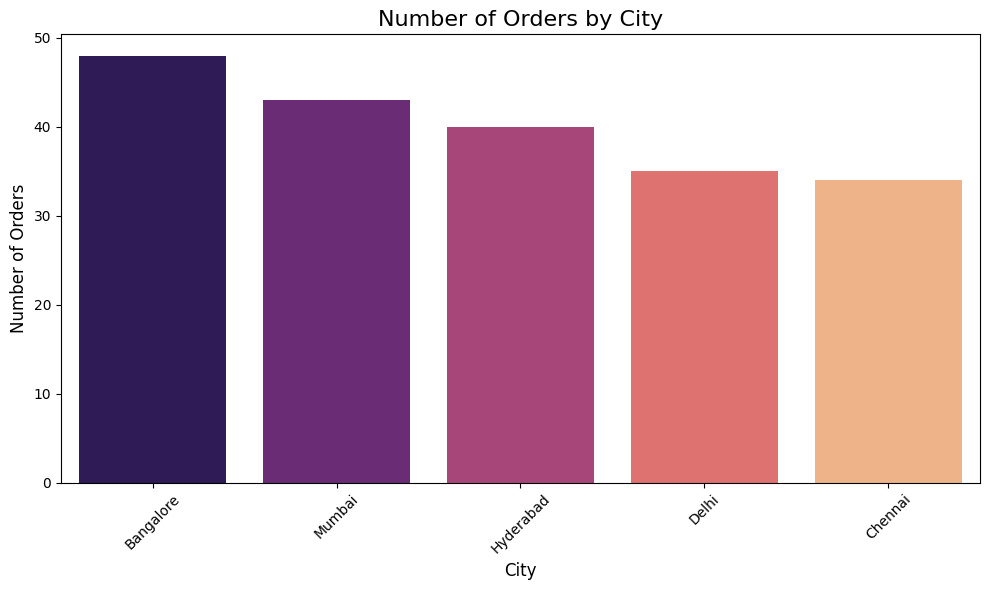

In [ ]:
orders_count_by_city = df["city"].value_counts()

plt.figure(figsize=(10,6))
sns.barplot(x=orders_count_by_city.index, y=orders_count_by_city.values, palette="magma")

plt.title("Number of Orders by City", fontsize=16)
plt.xlabel("City", fontsize=12)
plt.ylabel("Number of Orders", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Task 5: Why Do Food Delivery Apps Give Different Offers in Different Cities?

Food delivery apps (like Swiggy, Zomato, UberEATS) do not give the same offers everywhere. The offers differ city by city because of multiple business and operational factors:

1.Market Competition:

•	If many delivery platforms are active in a city (e.g., Bangalore, Delhi), apps give heavier discounts to attract customers.

•	In smaller cities with less competition, offers are fewer.

2.Customer Behaviour & Spending Power:

•	Metro city customers often spend more, so apps give value-base offers (e.g., free deliveries above Rs299.

•	Tier-2 or Tier-3 city customers are more price-sensitive, so apps give flat discounts to attract them.

3.Restaurant Density:

•	Cities with thousands of restaurants -> more partnerships ->more promo codes.

•	Smaller cities with limited options -> fewer offers.

4.Operational & Delivery Costs:

•	Delivery cost varies by city (traffic, distance, fuel, rider availability).

•	Apps adjust offers so they don't lose too much money in expensive delivery cities.

5.Demand Patterns:

•	Some cuisines are very popular in specific cities (e.g., South Indian in Chennai/Hyderabad)

• Offers are customized to promote less popular.





Reflection / Discussion Prompts



1. If this were a real food delivery platform, how would you use these insights (top cuisines, top spenders, busiest city)?

Top Cuisines -- Highlight popular cuisines in promotions, negotiate better deals with restaurants serving them, recommend them to new users.

Top Spenders -- Run loyalty programs, VIP discounts, or early access offers for these high-value customers to retain them.

Busiest City -- Have restaurant partnerships in that city, allocate more riders during peak hours, and expand marketing where demand is highest.

2. What data quality issues would you expect at larger scale?

Duplicates: Same order/user appearing multiple times due to retries, API errors, or system bugs.

Missing values: Orders without city, cuisine, or spend amount, especially from new restaurants or integration issues.

Outliers: Extremely high order values (data entry errors, fraud) or zero-amount orders (failed payments).

Inconsistent formatting: e.g., "Bangalore" vs "Bengaluru", "Fast Food" vs "fastfood".

3. Which problems would require streaming/near-real-time processing instead of batch?

Fraud detection: Spot unusual order amounts or suspicious activity instantly.

Dynamic offers: Give discounts in real-time when demand is low or delivery capacity is high.

Delivery logistics: Continuously update driver locations, assign orders dynamically, reroute for traffic.

Real-time dashboards: Show live order volumes per city, cuisine trends, or busiest times.

Customer experience: Immediately update order tracking and ETA notifications.

In [ ]:
# Task 6: Largest order in each city
df = pd.DataFrame(orders)

largest_order_per_city = df.loc[df.groupby("city")["order_amount"].idxmax()]



In [ ]:
# Task 7: Most loyal customers (highest order count)
loyal_customers = df["user_id"].value_counts().head(5)


In [ ]:
# Task 8: City with widest variety of cuisines
city_variety = df.groupby("city")["cuisine"].nunique().sort_values(ascending=False)

In [ ]:
# Task 9: Users with high frequency of orders (top 5 by count)
high_freq_users = df["user_id"].value_counts().head(5)

In [ ]:
# Task 10: Users who ordered from multiple cities
distinct_cities_per_user = df.groupby("user_id")["city"].nunique()
multi_city_users = distinct_cities_per_user[distinct_cities_per_user > 1]

In [ ]:
# Task 11: Most dominant cuisine in each city
dominant_cuisine_per_city = df.groupby(["city", "cuisine"])["order_amount"].sum().reset_index()
dominant_cuisine_per_city = dominant_cuisine_per_city.loc[dominant_cuisine_per_city.groupby("city")["order_amount"].idxmax()]

In [ ]:
# Task 12: Average order amount of each city
df["order_amount"] = pd.to_numeric(df["order_amount"], errors="coerce")
avg_order_city = df.groupby("city")["order_amount"].mean()

In [ ]:
# Task 13: City with highest total revenue
city_revenue = df.groupby("city")["order_amount"].sum().sort_values(ascending=False)

In [ ]:
# Task 14: Largest one-time order
largest_order = df.loc[df["order_amount"].idxmax()]

In [ ]:
# Task 15: Favourite cuisine ordered by each customer
fav_cuisine_per_user = df.groupby(["user_id", "cuisine"]).size().reset_index(name="count")
fav_cuisine_per_user = fav_cuisine_per_user.loc[fav_cuisine_per_user.groupby("user_id")["count"].idxmax()]

In [ ]:
# Task 16: Highest spending user in each city
highest_spender_city = df.groupby(["city", "user_id"])["order_amount"].sum().reset_index()

In [ ]:
# For each city, pick the user with the maximum spending
highest_spender_city = highest_spender_city.loc[
    highest_spender_city.groupby("city")["order_amount"].idxmax()
]

In [ ]:
# Print Results
print("Task 6 - Largest Order in Each City:\n", largest_order_per_city, "\n")
print("Task 7 - Most Loyal Customers:\n", loyal_customers, "\n")
print("Task 8 - City with Widest Variety of Cuisines:\n", city_variety, "\n")
print("Task 9 - High Frequency Users:\n", high_freq_users, "\n")
print("Task 10 - Users from Multiple Cities:\n", multi_city_users, "\n")
print("Task 11 - Dominant Cuisine in Each City:\n", dominant_cuisine_per_city, "\n")
print("Task 12 - Average Order Amount per City:\n", avg_order_city, "\n")
print("Task 13 - City with Highest Revenue:\n", city_revenue, "\n")
print("Task 14 - Largest One-Time Order:\n", largest_order, "\n")
print("Task 15 - Frequent Cuisine per User:\n", fav_cuisine_per_user, "\n")
print("Task 16 - Highest Spending User in Each City:\n", highest_spender_city)

Task 6 - Largest Order in Each City:
     user_id       city       cuisine order_amount
26     U005  Bangalore     Fast Food          997
118    U045    Chennai       Italian          993
42     U012      Delhi  South Indian          991
98     U036  Hyderabad  South Indian          999
65     U028     Mumbai       Italian          984 

Task 7 - Most Loyal Customers:
 user_id
U013    8
U048    7
U021    7
U030    6
U008    6
Name: count, dtype: int64 

Task 8 - City with Widest Variety of Cuisines:
 city
Bangalore    5
Chennai      5
Delhi        5
Hyderabad    5
Mumbai       5
Name: cuisine, dtype: int64 

Task 9 - High Frequency Users:
 user_id
U013    8
U048    7
U021    7
U030    6
U008    6
Name: count, dtype: int64 

Task 10 - Users from Multiple Cities:
 user_id
U001    3
U002    4
U003    3
U004    3
U005    3
U006    2
U007    3
U008    5
U009    3
U011    3
U012    3
U013    4
U014    2
U015    3
U016    3
U017    3
U018    2
U020    2
U021    3
U022    3
U026    2
U027    2